In [29]:
import pickle
import warnings
warnings.simplefilter("ignore")

latest_dataset = "Amazon_Digital_Music"

with open(f'sliding_result_{latest_dataset}_BPR.pickle', 'rb') as f:
    results = pickle.load(f)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def flatten_dict(nested_dict):
    res = OrderedDict()
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            if k in ["best_valid_score", "valid_score_bigger", "best_valid_result"]:
                continue
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(-1, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res

df = pd.DataFrame(pd.Series(flatten_dict(results)))

unstacked = df.unstack(level=1)

sorted_table = unstacked.unstack().unstack().T.droplevel(0).reorder_levels([2,0,1]).sort_index()
sorted_table = sorted_table.dropna()
sorted_table = pd.DataFrame(sorted_table.stack())
sorted_table.columns = ["val"]
measure_name = sorted(list(set([tup[2] for tup in sorted_table.index])))
measure_name

['AI-F_ori@5',
 'Ent_our@5',
 'FSat_ori@5',
 'FSat_our@5',
 'Gini-w_ori@5',
 'Gini-w_our@5',
 'Gini_ori@5',
 'Gini_our@5',
 'HR@5',
 'IAA_our@5',
 'IAA_pred_ori@5',
 'IAA_true_ori@5',
 'IBO_our@5',
 'II-F_ori@5',
 'IWO_our@5',
 'Jain_ori@5',
 'Jain_our@5',
 'MAP@5',
 'MME_ori@5',
 'MRR@5',
 'NDCG@5',
 'P@5',
 'QF_ori@5',
 'QF_our@5',
 'R@5',
 'VoCD_ori@5',
 'VoCD_our@5']

In [33]:
thetable = sorted_table.unstack()

In [39]:
selected_index = df.index.droplevel([0,1,2]).unique()
selected_index

Index(['HR@5', 'MRR@5', 'P@5', 'MAP@5', 'R@5', 'NDCG@5', 'Jain_ori@5',
       'Jain_our@5', 'QF_ori@5', 'QF_our@5', 'Ent_ori@5', 'Ent_our@5',
       'Gini_ori@5', 'Gini_our@5', 'Gini-w_ori@5', 'FSat_ori@5', 'FSat_our@5',
       'VoCD_ori@5', 'IBO_ori@5', 'IWO_ori@5', 'IBO_our@5', 'IWO_our@5',
       'IAA_pred_ori@5', 'IAA_true_ori@5', 'MME_ori@5', 'II-F_ori@5',
       'AI-F_ori@5'],
      dtype='object')

In [40]:
selected_index = pd.Index([
    'HR@5', 'MRR@5', 'P@5', 'MAP@5', 'R@5', 'NDCG@5', 
    'Jain_ori@5','Jain_our@5', 'QF_ori@5', 'QF_our@5', 'Ent_ori@5', 'Ent_our@5','FSat_ori@5','FSat_our@5', 
    'IBO_ori@5','IBO_our@5',
    'Gini_ori@5', 'Gini_our@5', 'Gini-w_ori@5','VoCD_ori@5',
    'IWO_ori@5', 'IWO_our@5', 'IAA_pred_ori@5', 'IAA_true_ori@5',
       'MME_ori@5', 'II-F_ori@5', 'AI-F_ori@5'
])

In [41]:
thetable.droplevel(1).reindex(selected_index, level=1)

val                                \
                                          1-5       2-6       3-7       4-8   
Amazon_Digital_Music HR@5            0.078809  0.050383  0.040681  0.036511   
                     MRR@5           0.050757  0.027682  0.020635  0.018165   
                     P@5             0.015881  0.010111  0.008153  0.007336   
                     MAP@5           0.048269  0.026094  0.019327  0.017168   
                     R@5             0.074854  0.047270  0.037784  0.034013   
...                                       ...       ...       ...       ...   
ml-1m                IAA_pred_ori@5  0.444454  0.444471  0.444481  0.444488   
                     IAA_true_ori@5  0.004704  0.004713  0.004718  0.004722   
                     MME_ori@5       0.000334  0.000295  0.000281  0.000269   
                     II-F_ori@5      0.001193  0.001197  0.001200  0.001202   
                     AI-F_ori@5      0.000015  0.000011  0.000009  0.000007   

                                               
                                          5-9  
Amazon_Digital_Music HR@5            0.032936  
                     MRR@5           0.016427  
                     P@5             0.006638  
                     MAP@5           0.015058  
                     R@5             0.030154  
...                                       ...  
ml-1m                IAA_pred_ori@5  0.444494  
                     IAA_true_ori@5  0.004725  
                     MME_ori@5       0.000263  
                     II-F_ori@5      0.001203  
                     AI-F_ori@5      0.000007  

[144 rows x 5 columns]

In [43]:
selected_index = selected_index.str.strip("@5")

In [44]:
rel_measures = selected_index[~selected_index.str.contains("_")]
fair_measures = selected_index[selected_index.str.contains("_")]
only_fair_measures =fair_measures[~(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]
fair_with_rel_measures = fair_measures[(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]

In [45]:
only_fair_measures

Index(['Jain_ori', 'Jain_our', 'QF_ori', 'QF_our', 'Ent_ori', 'Ent_our',
       'FSat_ori', 'FSat_our', 'Gini_ori', 'Gini_our', 'Gini-w_ori',
       'VoCD_ori'],
      dtype='object')

In [46]:
only_fair_measures_higher_better  = only_fair_measures[only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
only_fair_measures_higher_worse  = only_fair_measures[~only_fair_measures.str.contains("Jain|QF|Ent|FSat")]

In [47]:
IBO = fair_with_rel_measures[fair_with_rel_measures.str.contains("IBO")]
IWO = fair_with_rel_measures[fair_with_rel_measures.str.contains("IWO")]

fair_with_rel_measures_higher_worse = fair_with_rel_measures[~fair_with_rel_measures.str.contains("IBO|IWO")]

In [48]:
thetable.loc['Amazon_Luxury_Beauty'].loc["BPR"]

val                                        
                     1-5       2-6       3-7       4-8       5-9
AI-F_ori@5      0.000217  0.000260  0.000238  0.000218  0.000194
Ent_our@5       0.689860  0.695982  0.720711  0.740035  0.759661
FSat_ori@5      0.189633  0.199747  0.209861  0.217446  0.227560
FSat_our@5      0.184478  0.194656  0.204835  0.212468  0.222646
Gini-w_ori@5    0.788224  0.768870  0.755294  0.737440  0.715519
Gini-w_our@5    0.792263  0.772809  0.759164  0.741218  0.719186
Gini_ori@5      0.775577  0.758159  0.743532  0.726196  0.705364
Gini_our@5      0.775325  0.757383  0.742315  0.724456  0.702996
HR@5            0.298054  0.060219  0.046229  0.031630  0.028589
IAA_our@5       0.003472  0.003472  0.003472  0.003472  0.003472
IAA_pred_ori@5  0.283618  0.284241  0.284453  0.284628  0.284751
IAA_true_ori@5  0.003909  0.004494  0.004514  0.004544  0.004553
IBO_our@5       0.148681  0.122302  0.115108  0.088729  0.079137
II-F_ori@5      0.003776  0.004366  0.004392  0.004422  0.004431
IWO_our@5       0.851319  0.877698  0.884892  0.911271  0.920863
Jain_ori@5      0.074475  0.072979  0.085019  0.096401  0.109691
Jain_our@5      0.068740  0.067231  0.079374  0.090854  0.104258
MAP@5           0.262162  0.031916  0.025167  0.016037  0.013488
MME_ori@5       0.000453  0.000692  0.000682  0.000678  0.000635
MRR@5           0.264183  0.034002  0.028406  0.017153  0.014933
NDCG@5          0.270657  0.038551  0.030020  0.019622  0.016905
P@5             0.059976  0.012409  0.009367  0.006448  0.005718
QF_ori@5        0.806574  0.834387  0.843236  0.858407  0.865992
QF_our@5        0.805344  0.833333  0.842239  0.857506  0.865140
R@5             0.293796  0.056164  0.041717  0.029197  0.025953
VoCD_ori@5      0.591201  0.585827  0.586998  0.582982  0.576776
VoCD_our@5      0.591561  0.586183  0.587355  0.583337  0.577127

# Main Paper

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def forward(x):
    return x**(1/10)

def inverse(x):
    return x**10 * np.sign(x)


col_names = ["k","measure","score"]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Plot IBO-IWO on same axes

In [51]:
ori_our = pd.DataFrame(np.ones((2,3)),columns=["x","y","version"])
ori_our["version"] = ["ori","our"]

In [52]:
%%capture
for_legend, ax_legend = plt.subplots(1,1)
additional_plotting_dict = {"mec":None,"mfc":"none", "markersize":10}
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='ori'"), style='version', markers=["x"], dashes=False, **additional_plotting_dict)
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='our'"), style='version', markers=["o"], dashes=False, **additional_plotting_dict)

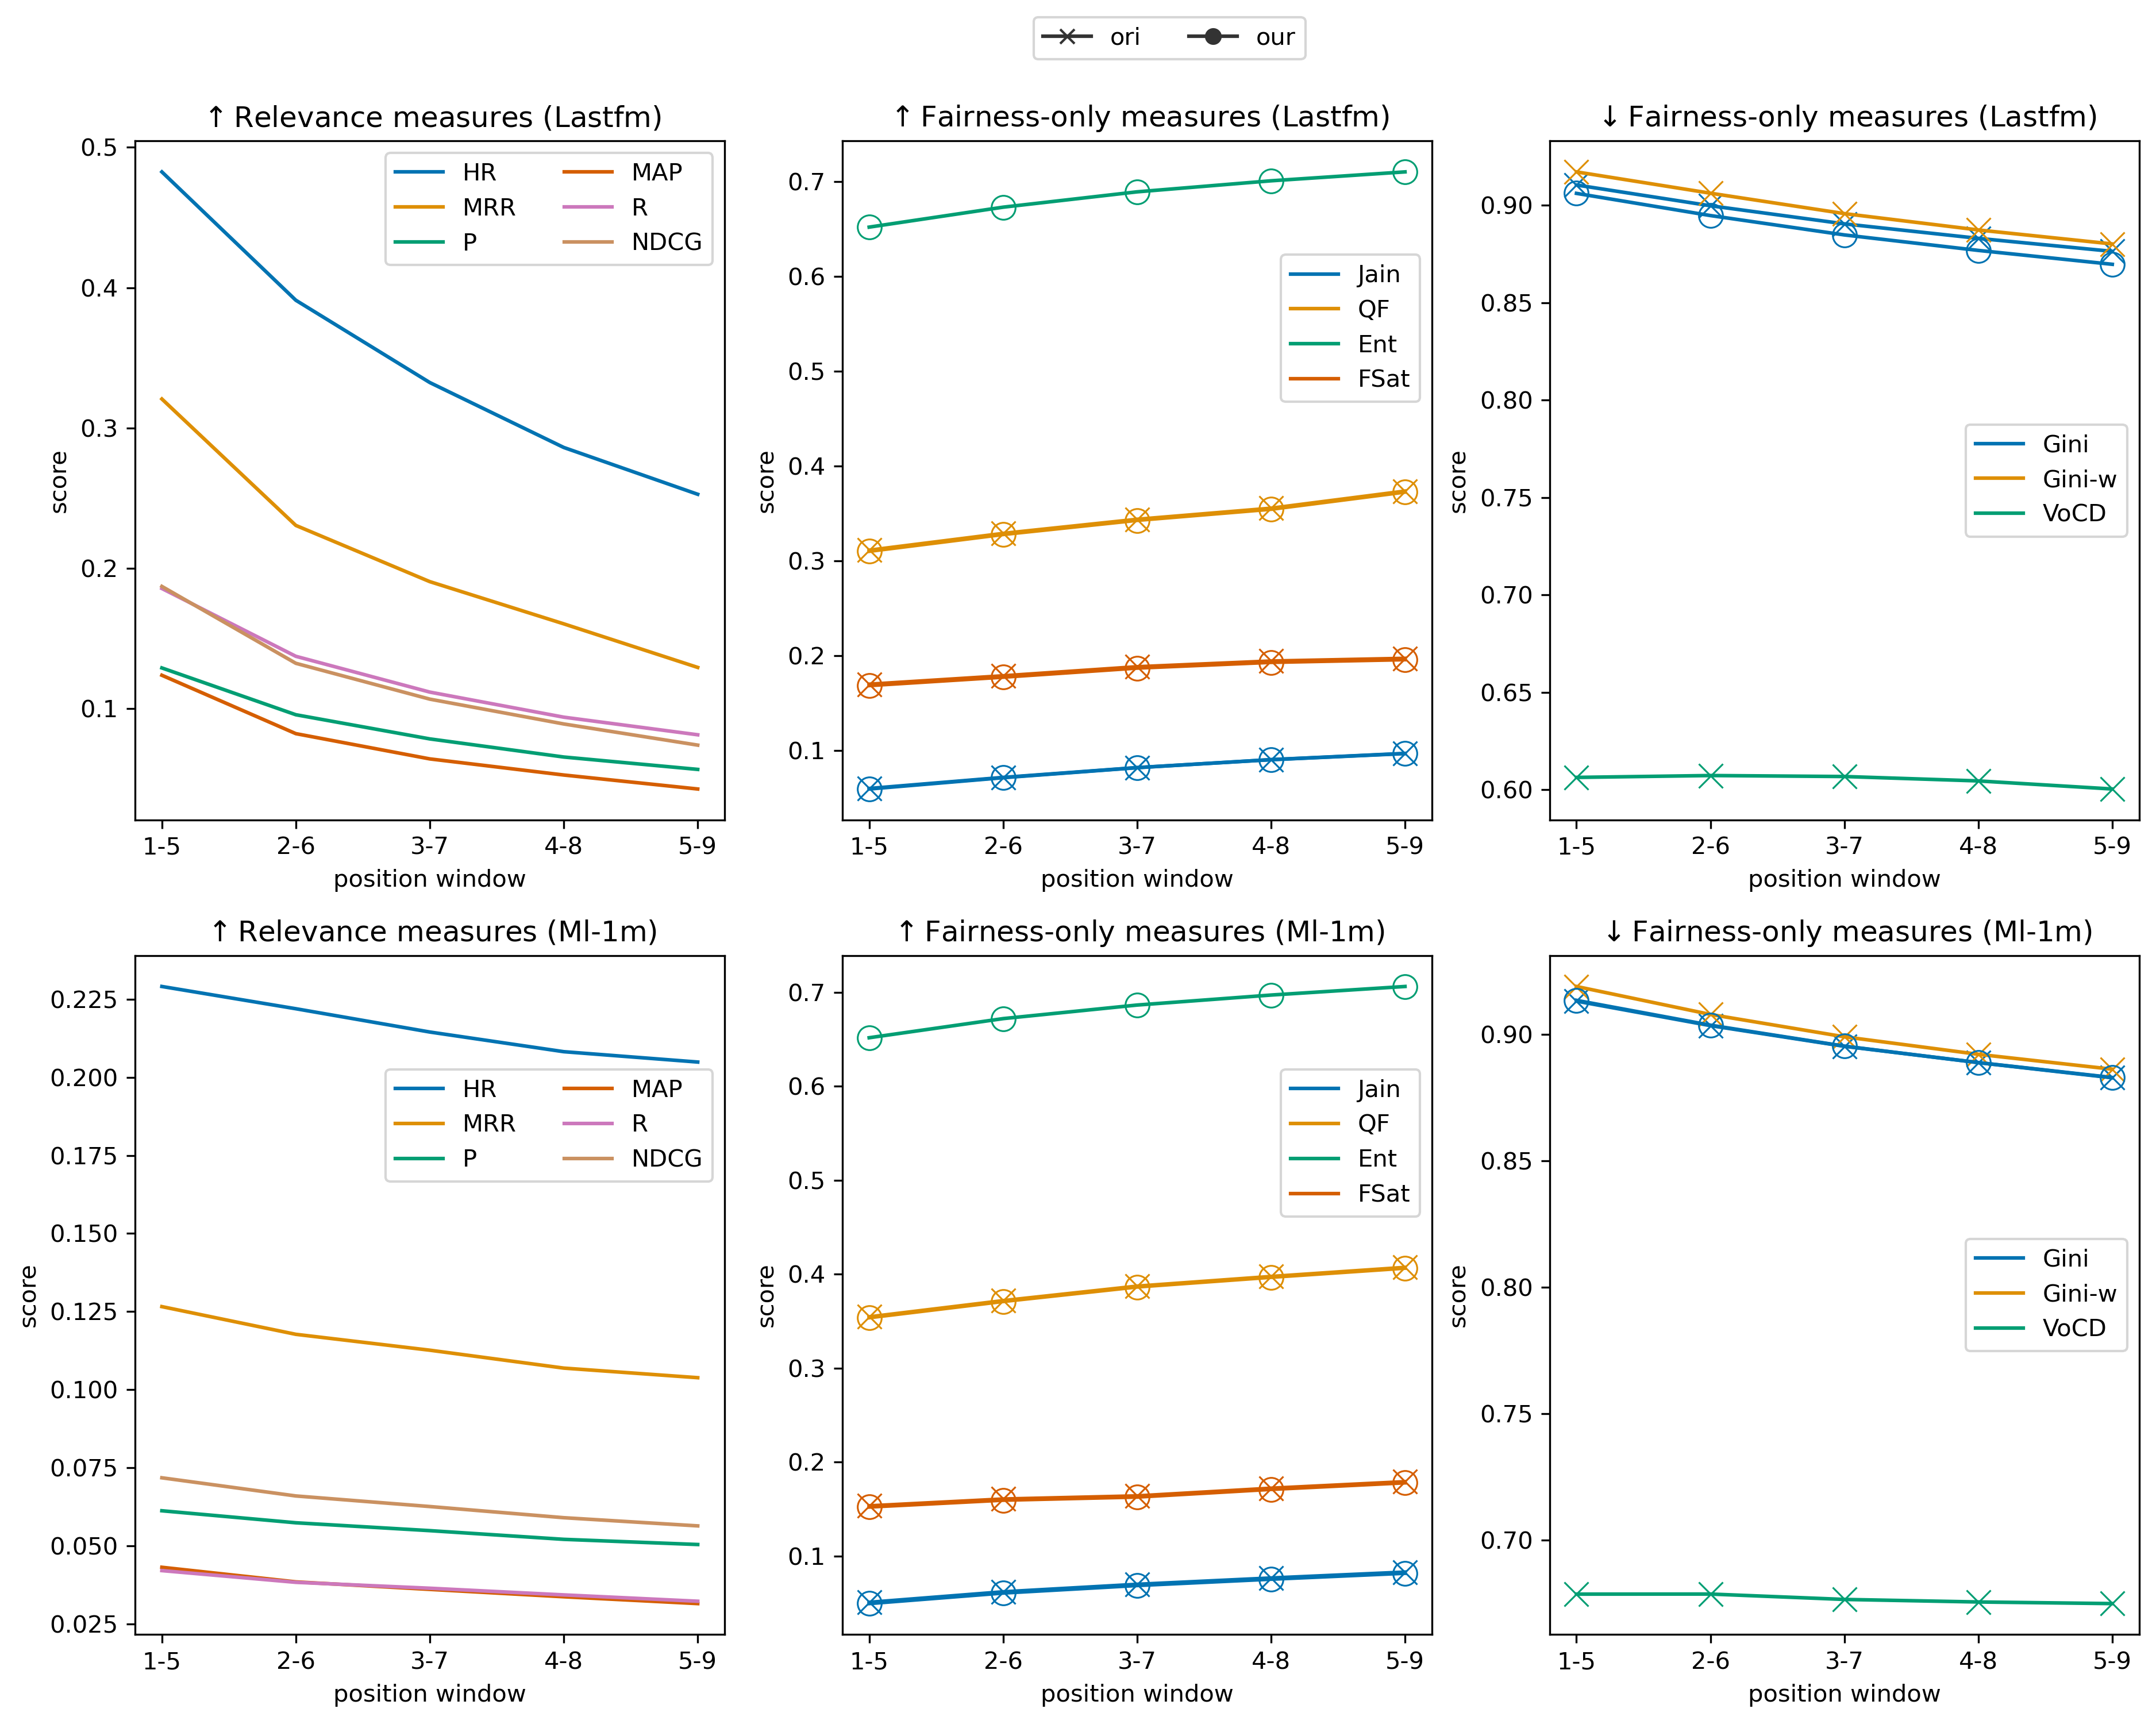

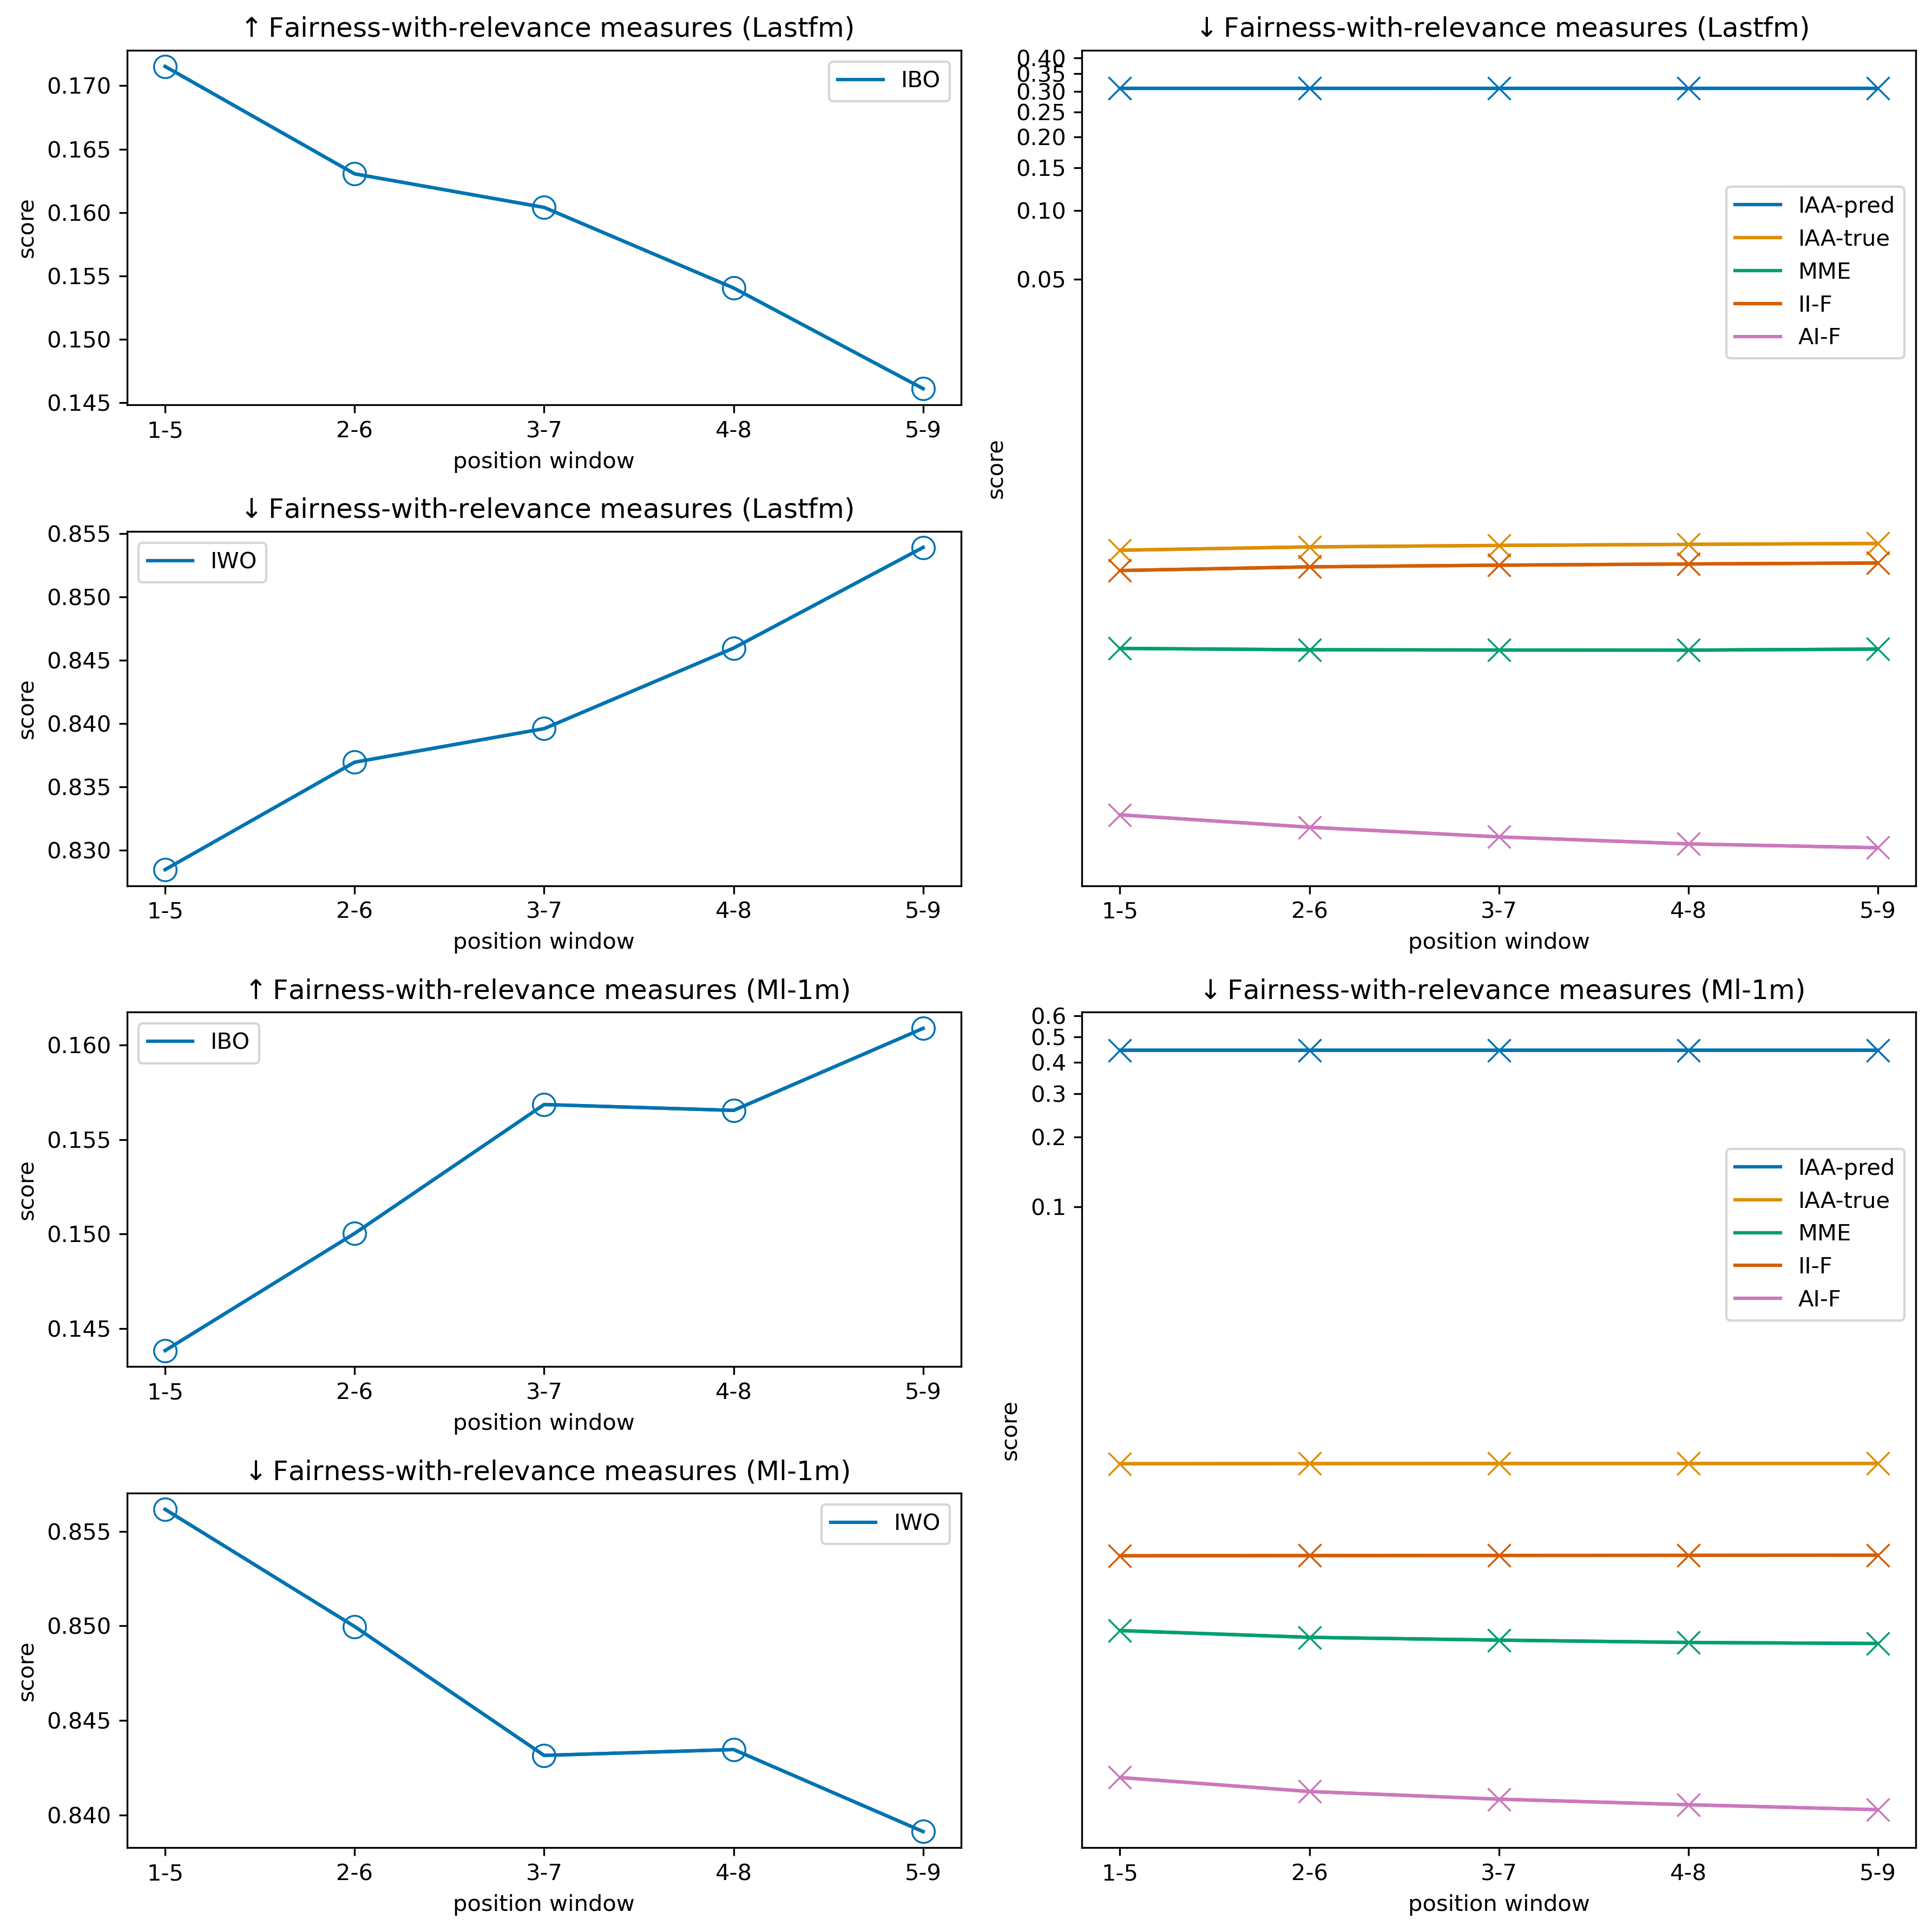

<Figure size 1920x1440 with 0 Axes>

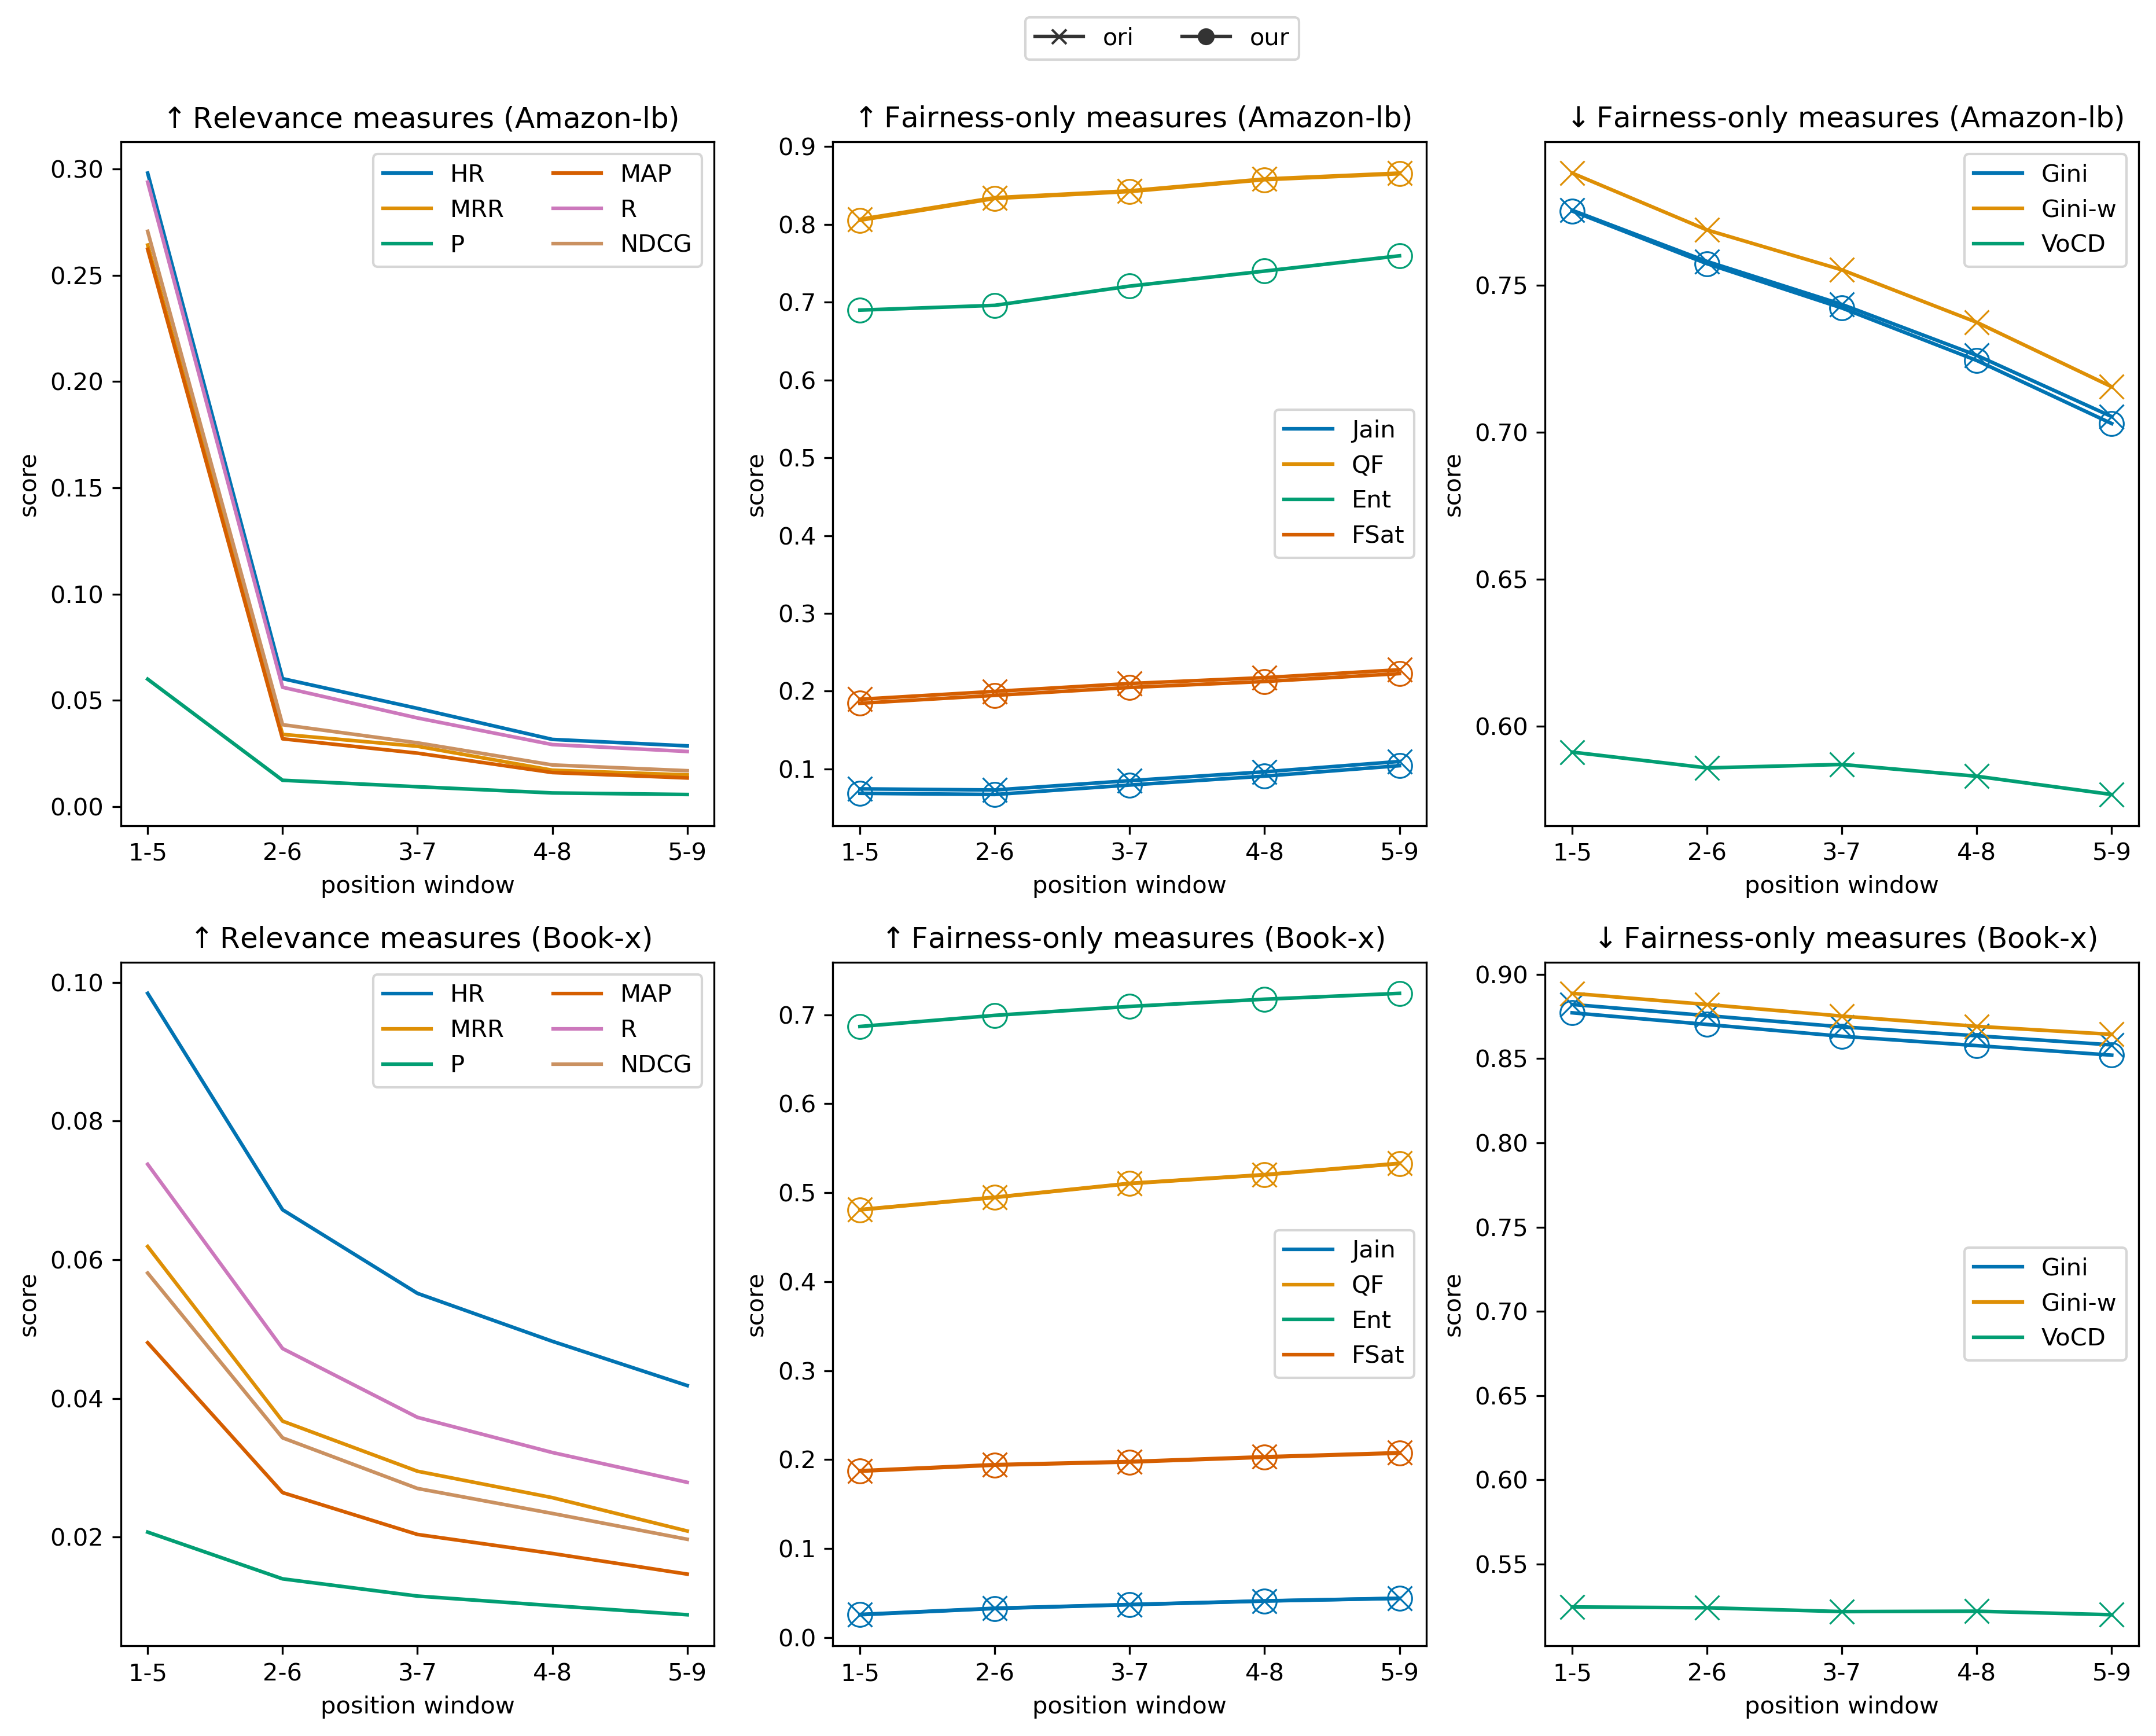

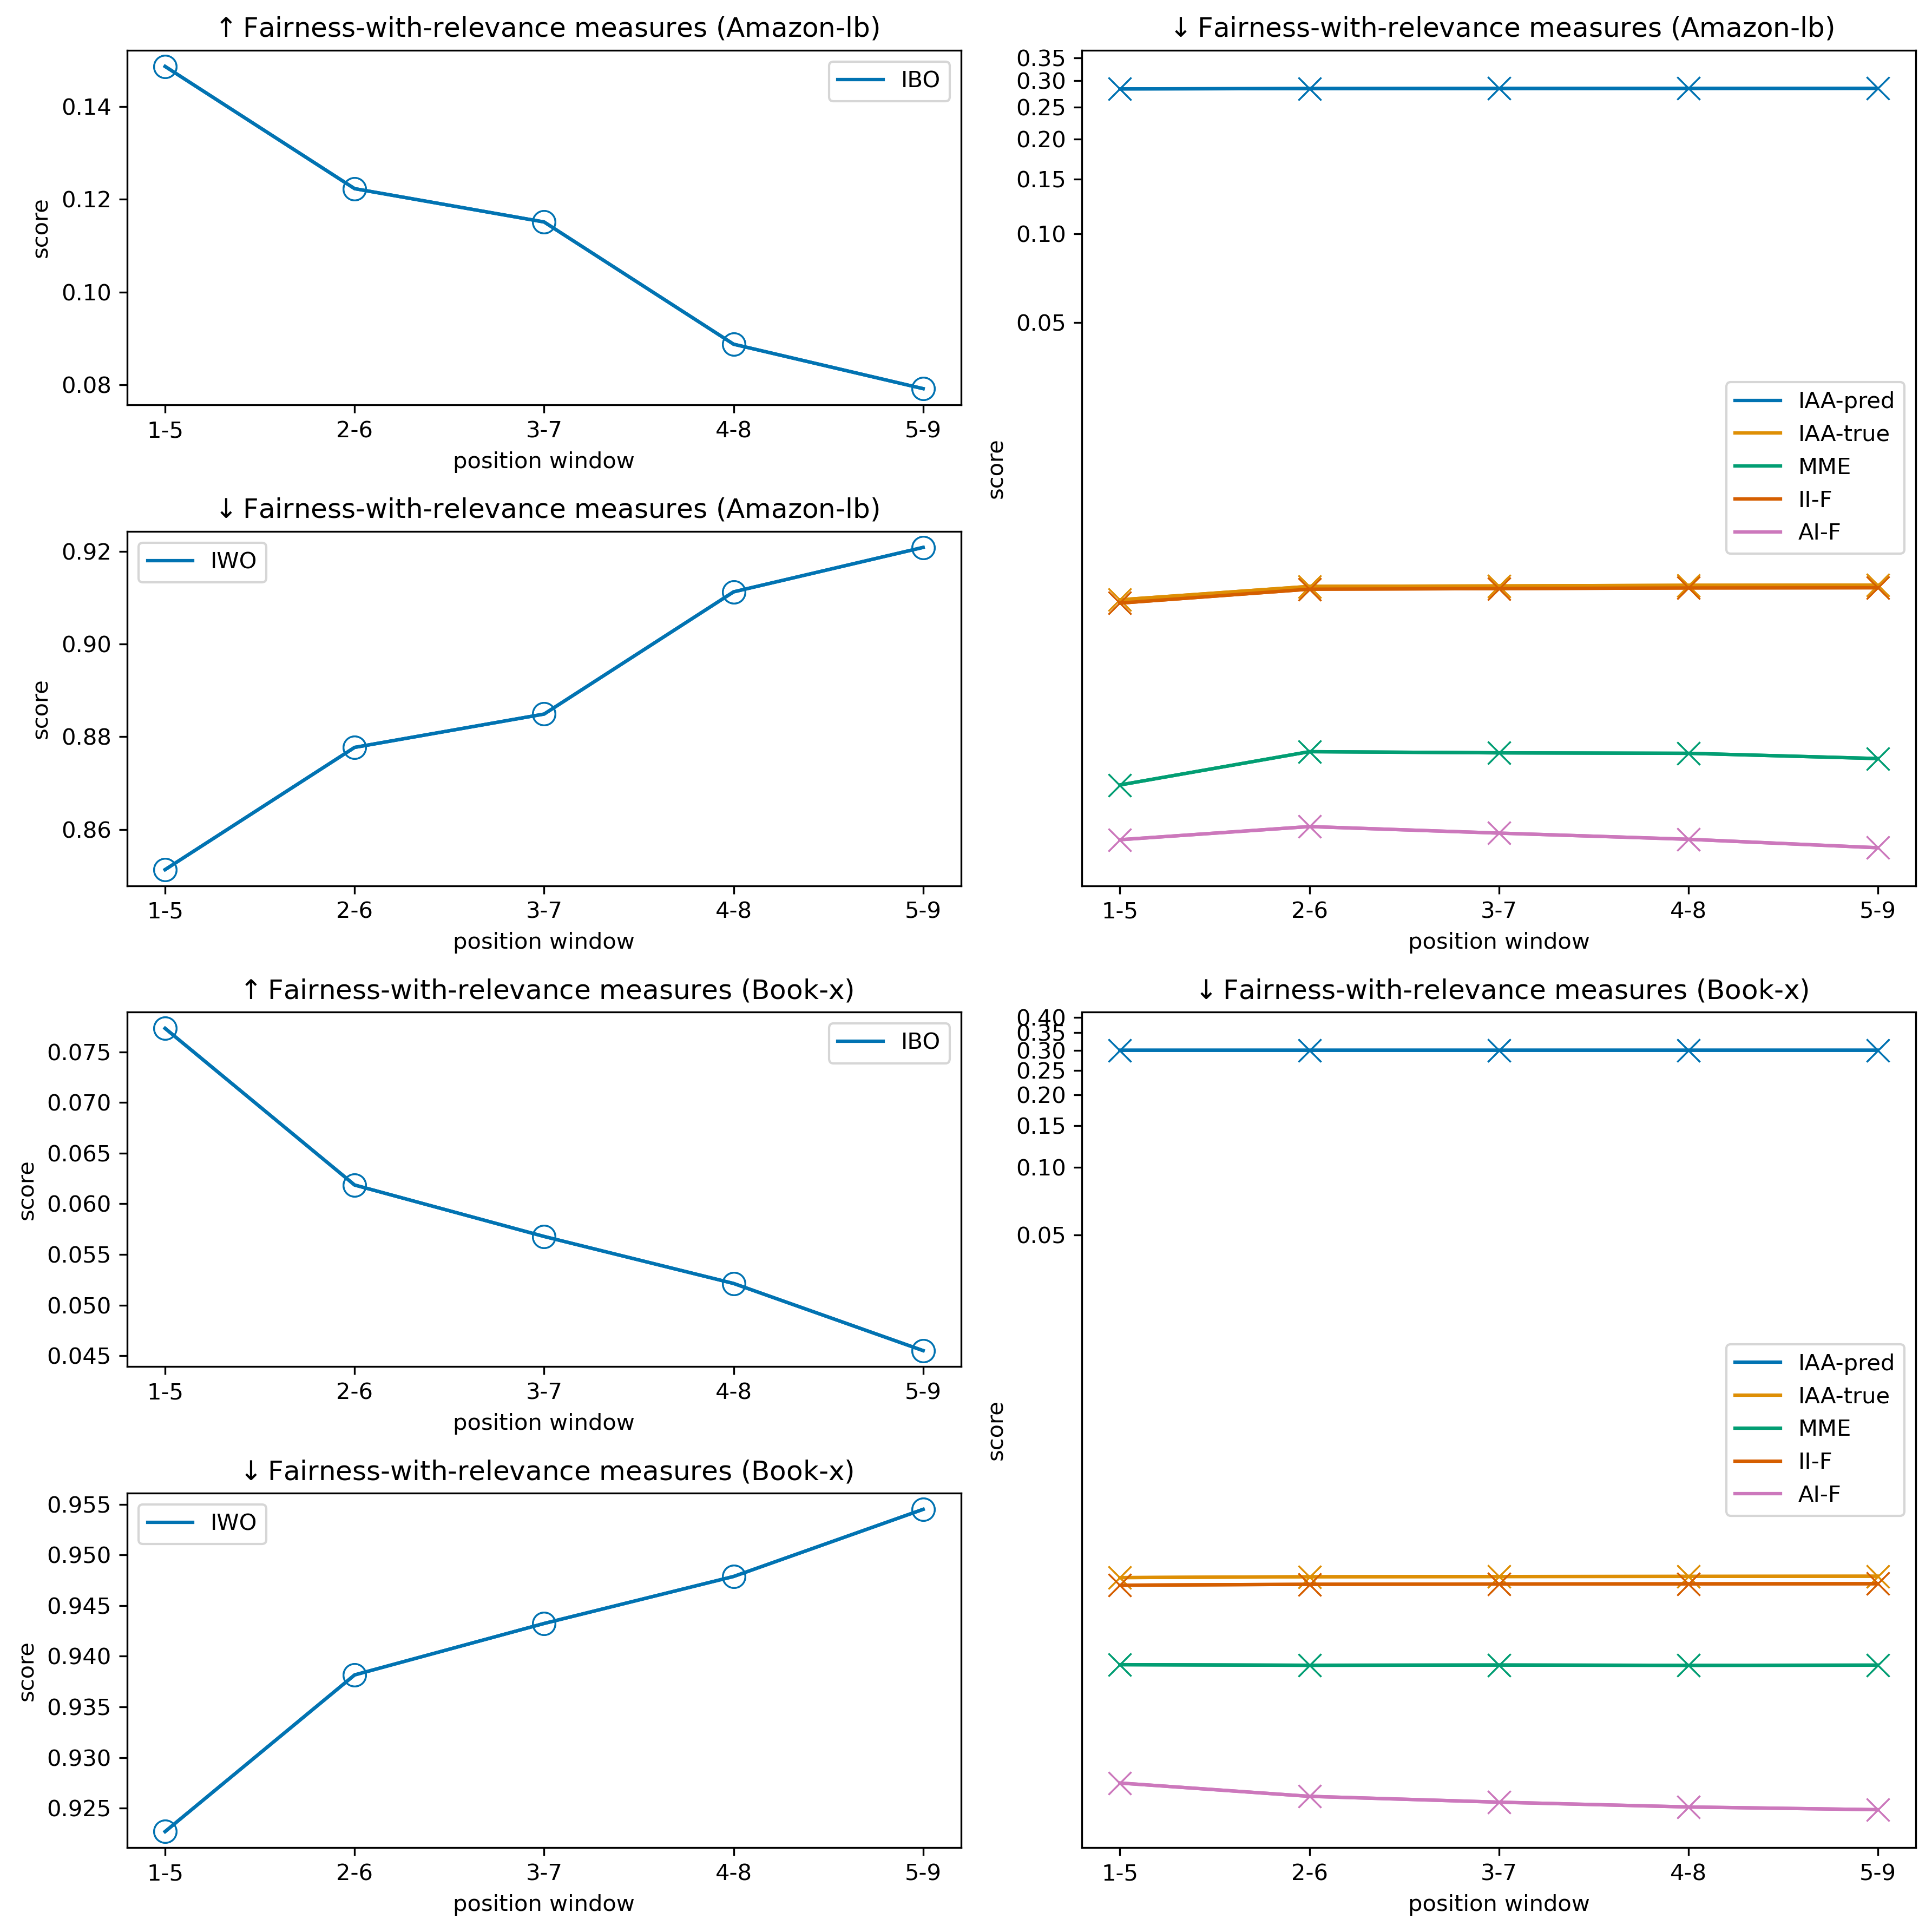

<Figure size 1920x1440 with 0 Axes>

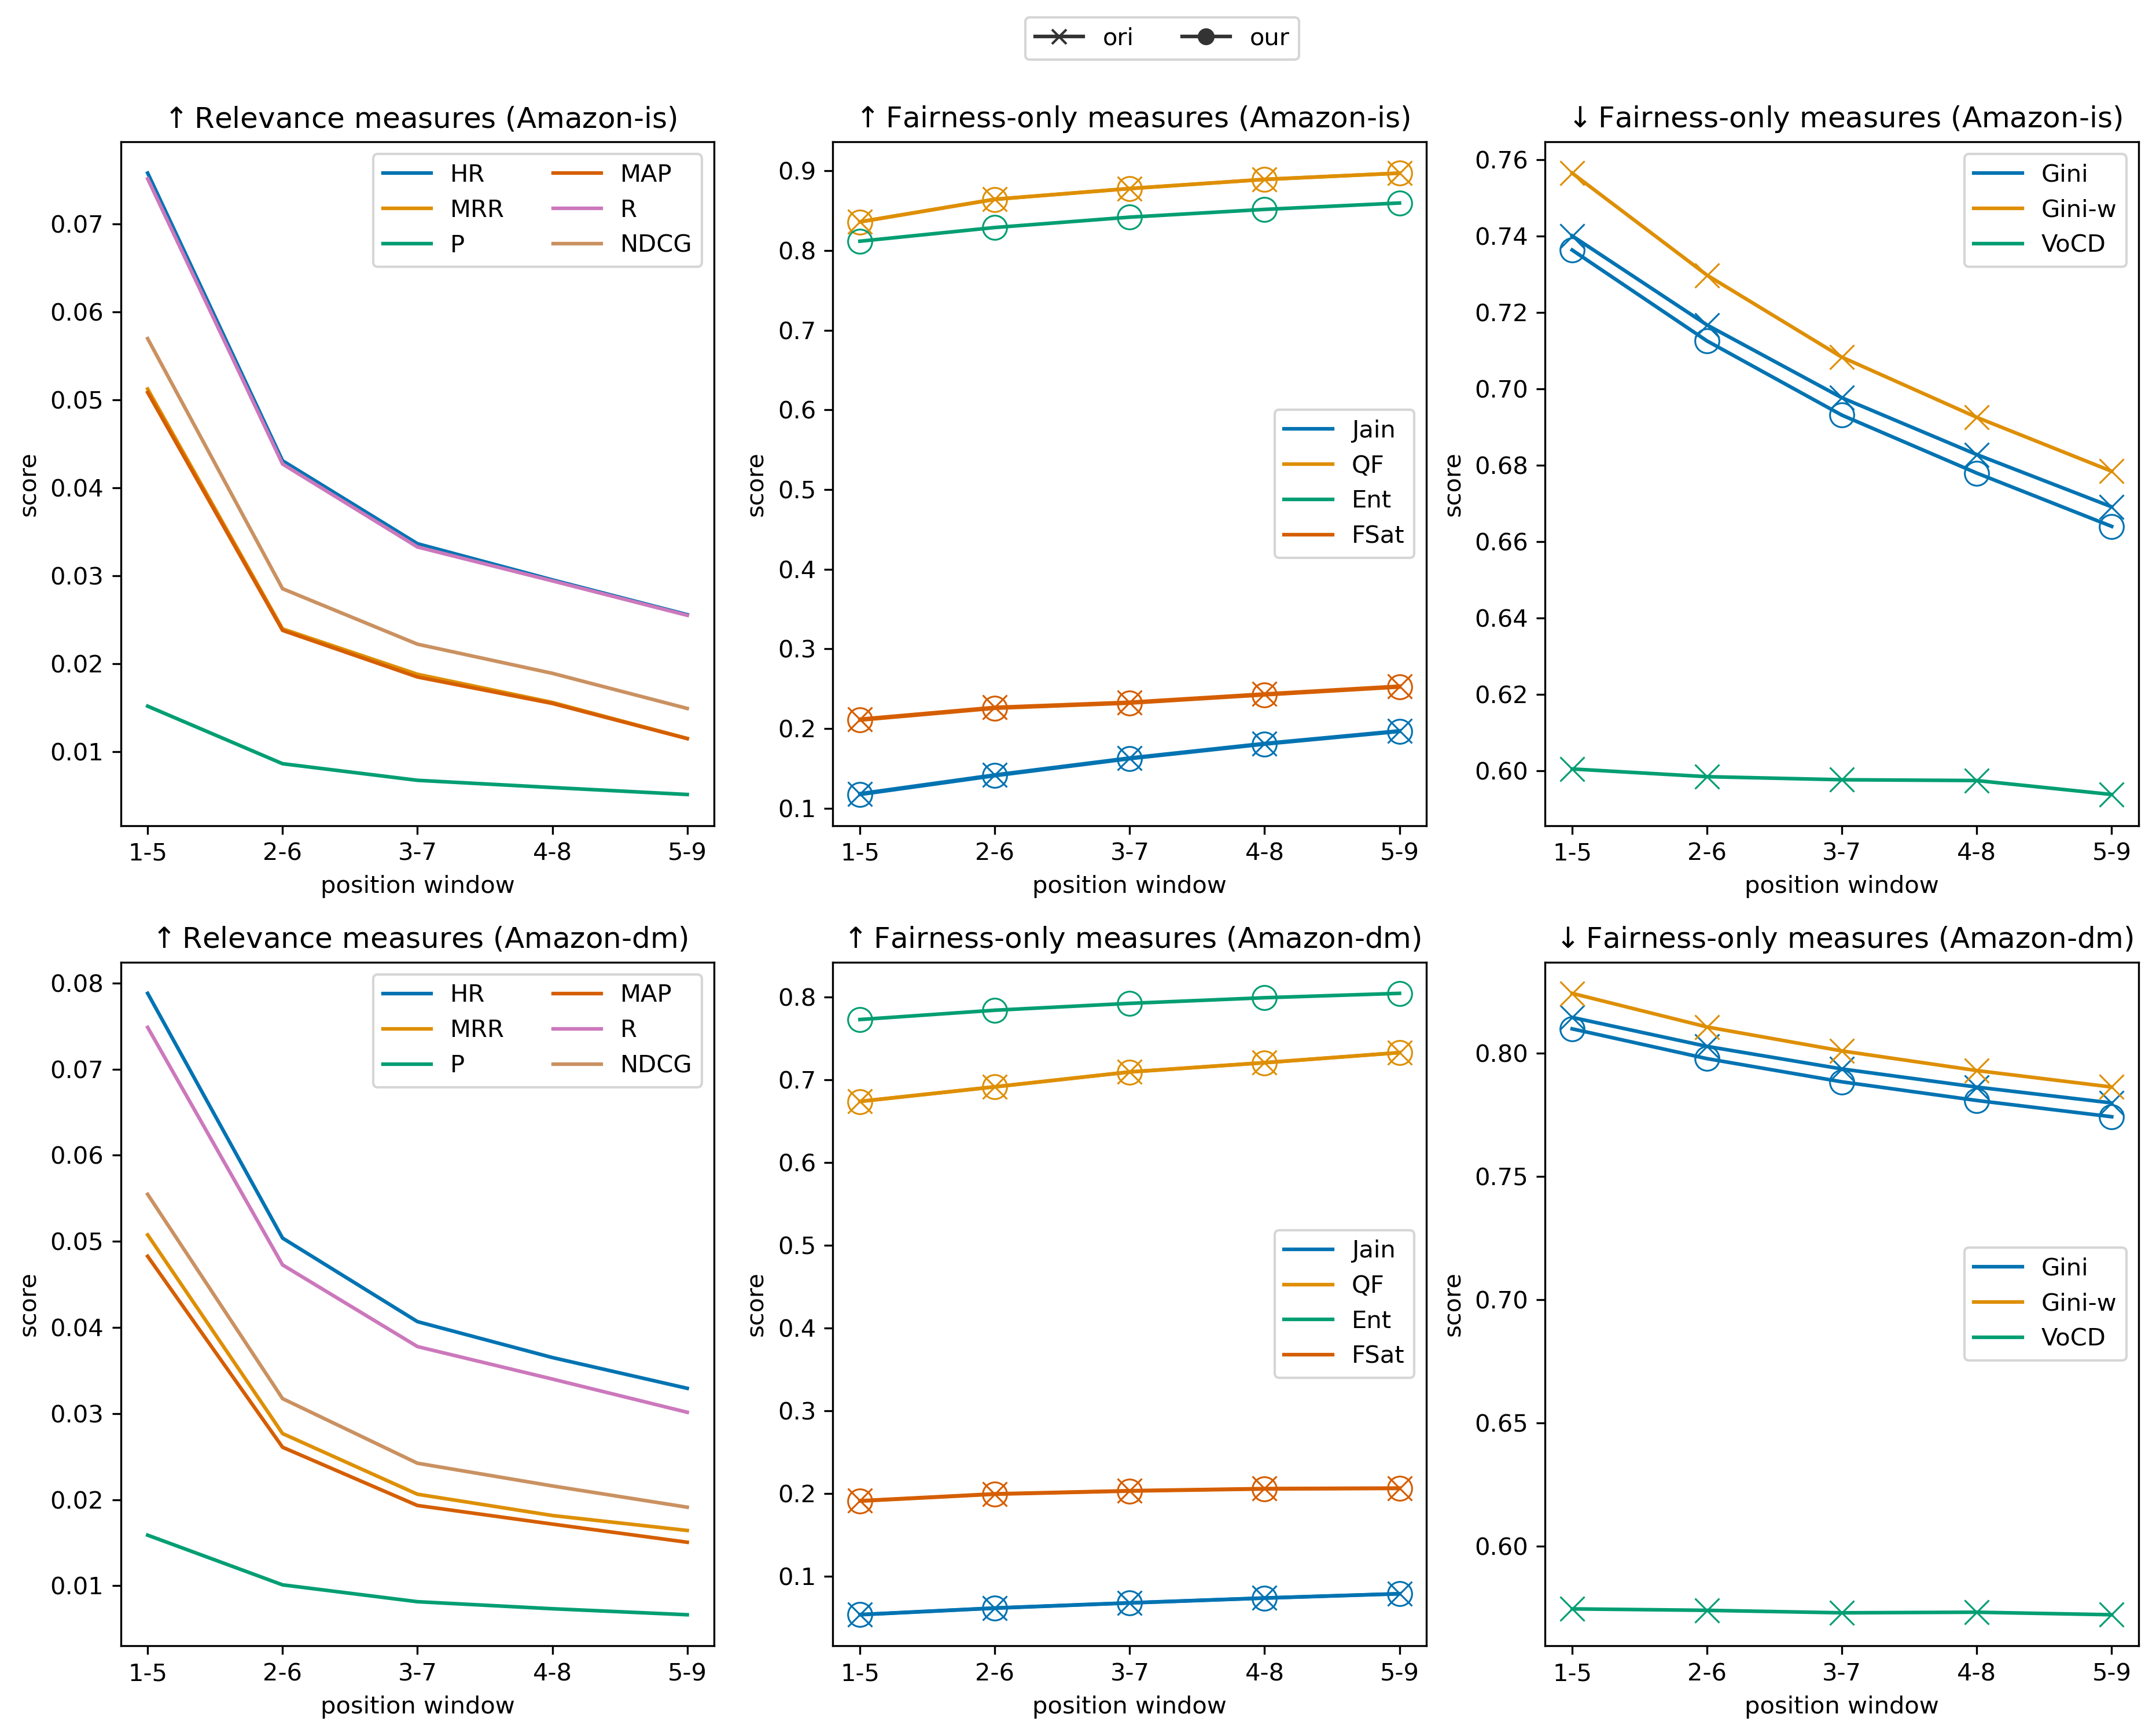

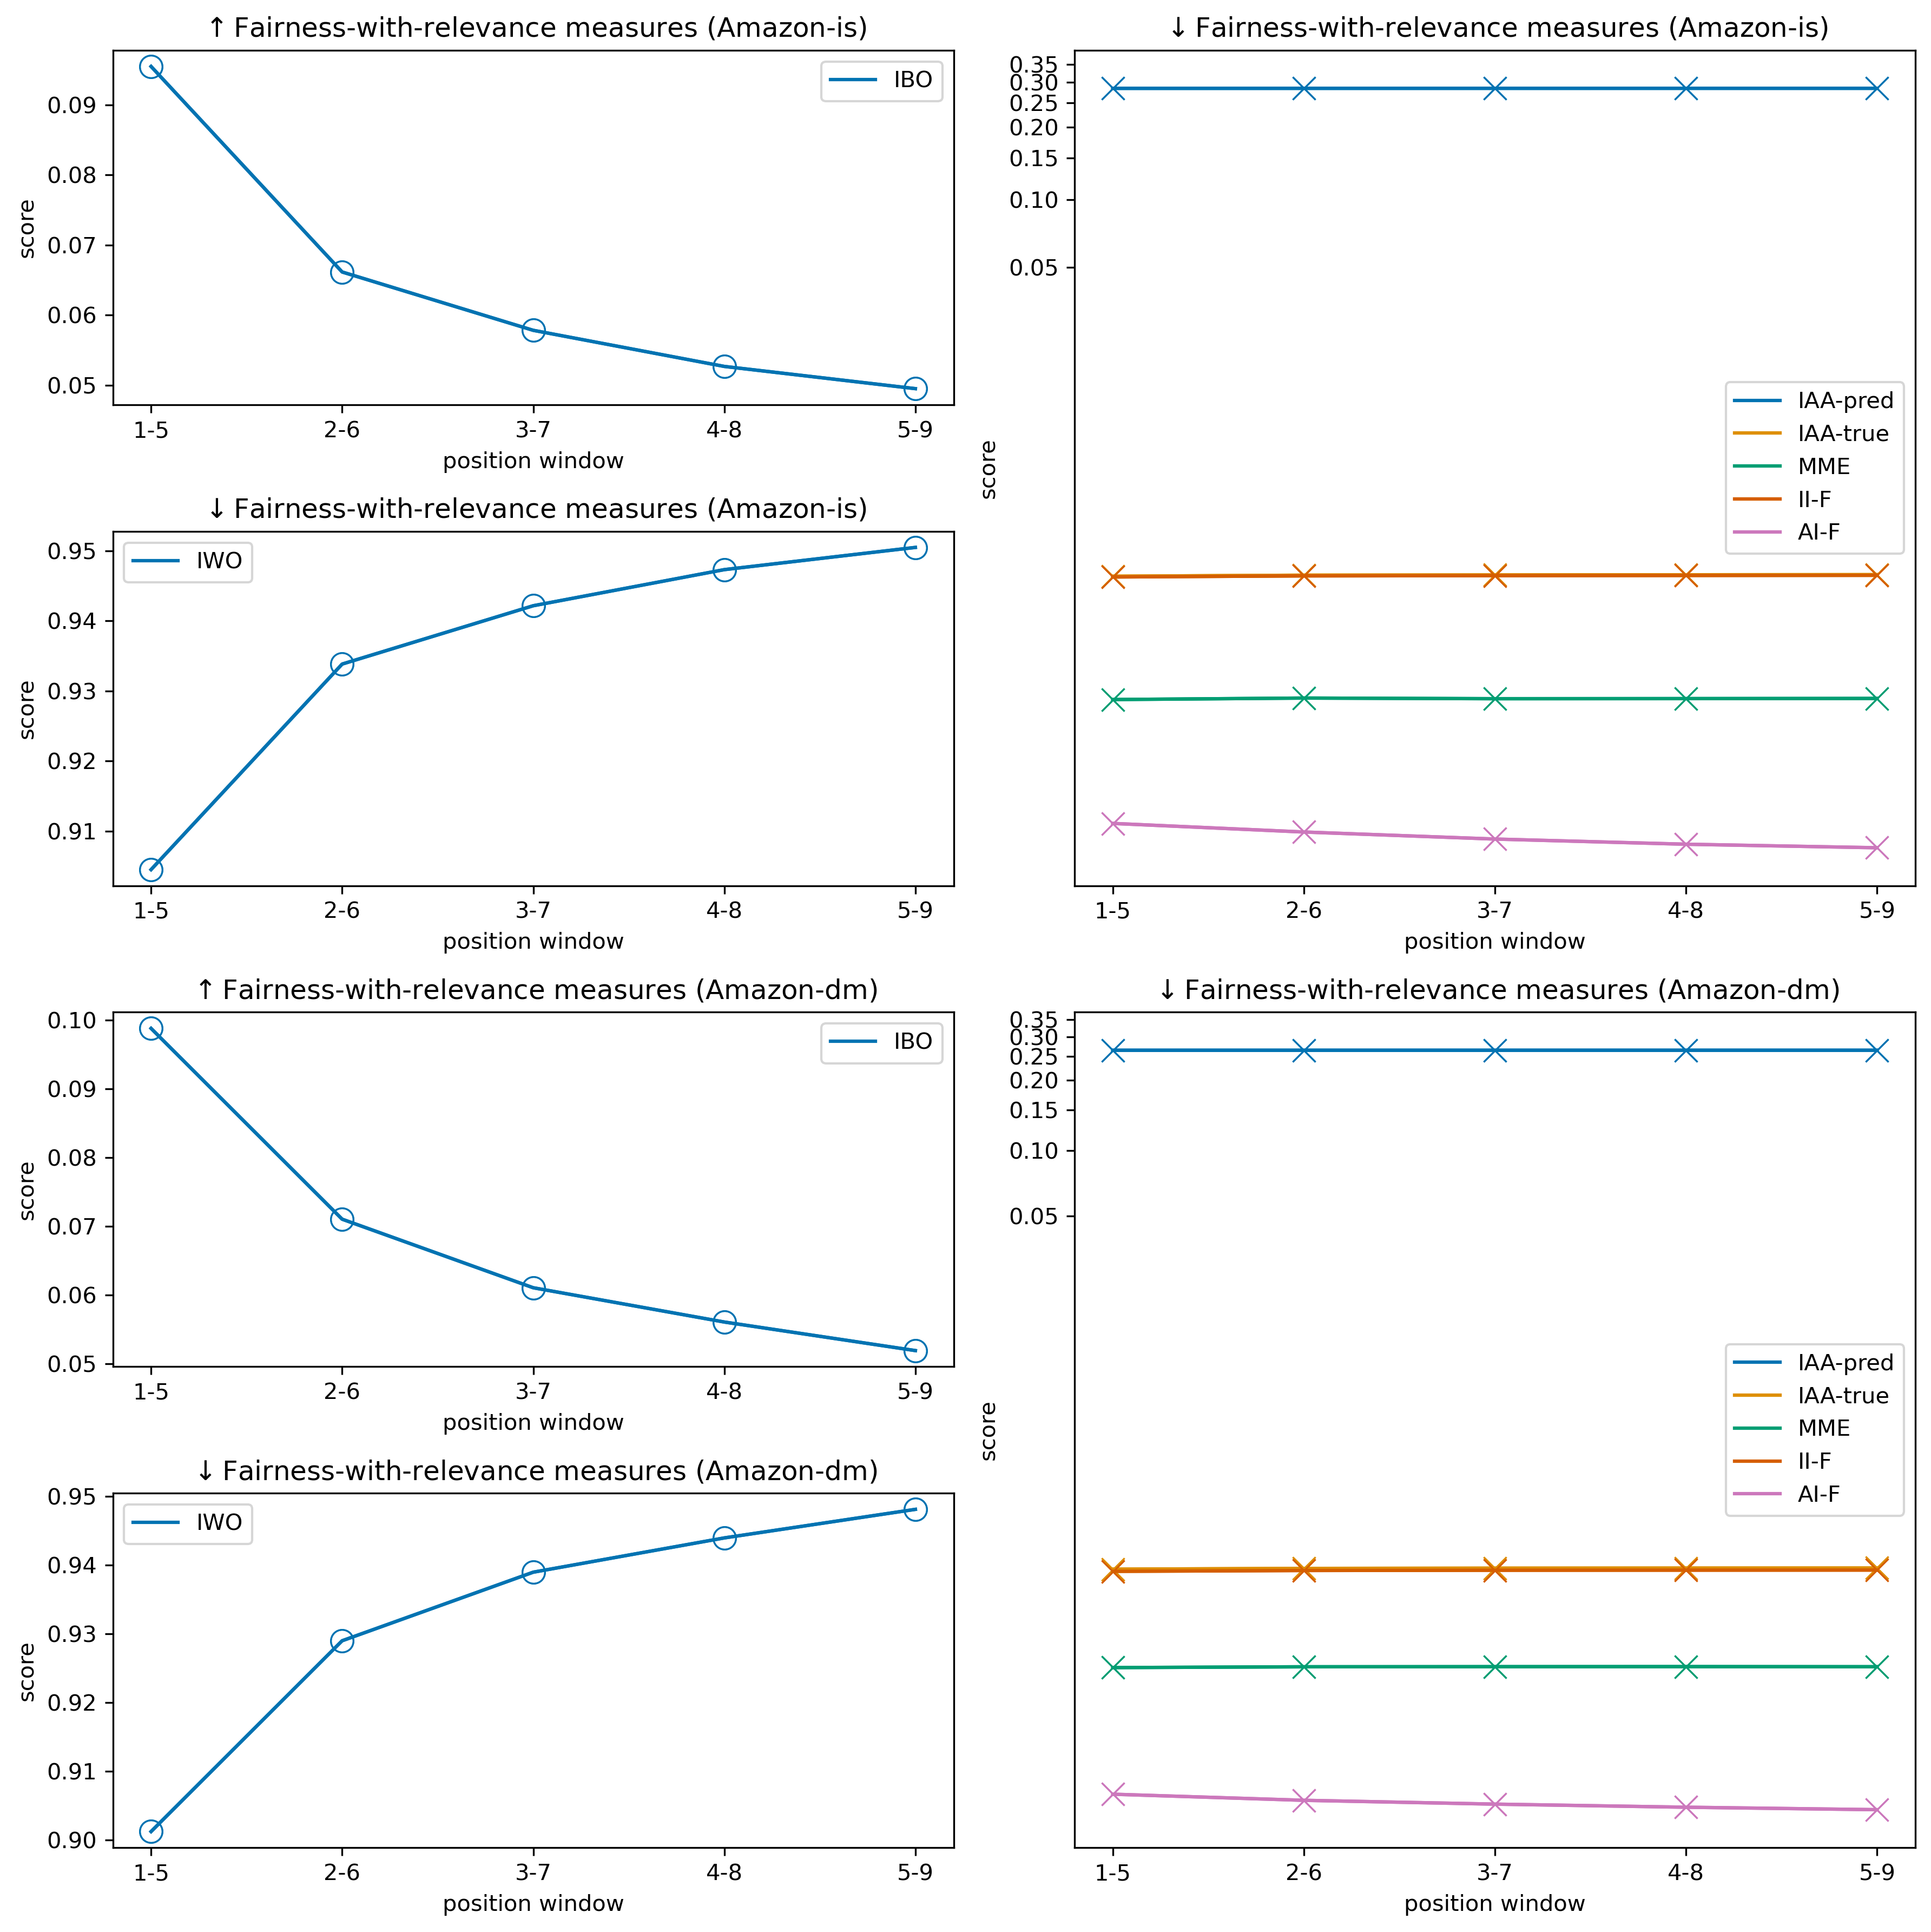

<Figure size 1920x1440 with 0 Axes>

In [53]:
for part, list_data in enumerate([
                                list(results.keys())[1:3],
                                ["Amazon_Luxury_Beauty","book-crossing"],
                                ["Amazon_Industrial_and_Scientific","Amazon_Digital_Music"]
                                ]):
    first_fig, ax= plt.subplots(2, 3, figsize=(15,15/4*3))
    fig = plt.figure(constrained_layout=True, figsize=(12,12))

    gs = GridSpec(4, 4, figure=fig)

    ax1 = fig.add_subplot(gs[:1, :2])
    ax2 = fig.add_subplot(gs[1:2,:2])
    ax3 = fig.add_subplot(gs[:2, 2:])
    ax4 = fig.add_subplot(gs[2:3, :2])
    ax5 = fig.add_subplot(gs[3:4, :2])
    ax6 = fig.add_subplot(gs[2:4, 2:])
    pass
    for i, data in enumerate(list_data):
        
        thisdata = thetable.loc[data].loc["BPR"].round(10)
        if data == "Amazon_Luxury_Beauty":
            data = "amazon-lb"
        elif data == "book-crossing":
            data = "book-x"
        elif data == "Amazon_Industrial_and_Scientific":
            data = "amazon-is"
        elif data == "Amazon_Digital_Music":
            data = "amazon-dm"
        thisdata.index = thisdata.index.str.strip("@5")
        rel_result = thisdata.reindex(rel_measures)
        only_fair_result_higher = thisdata.reindex(only_fair_measures_higher_better)
        only_fair_result_lower = thisdata.reindex(only_fair_measures_higher_worse)
        IBO_result = thisdata.reindex(IBO)
        IWO_result = thisdata.reindex(IWO)
        fair_w_rel_result_lower = thisdata.reindex(fair_with_rel_measures_higher_worse)

        df_rel_result = pd.DataFrame(rel_result.unstack()["val"]).reset_index()
        fair_higher = pd.DataFrame(only_fair_result_higher.unstack()["val"]).reset_index()
        fair_lower = pd.DataFrame(only_fair_result_lower.unstack()["val"]).reset_index()
        IBO_only = pd.DataFrame(IBO_result.unstack()["val"]).reset_index()
        IWO_only = pd.DataFrame(IWO_result.unstack()["val"]).reset_index()
        fair_rel_lower = pd.DataFrame(fair_w_rel_result_lower.unstack()["val"]).reset_index()

        df_rel_result.columns = col_names
        fair_higher.columns = col_names
        fair_lower.columns = col_names
        IBO_only.columns = col_names
        IWO_only.columns = col_names
        fair_rel_lower.columns = col_names

        splitted_fair_higher = fair_higher.measure.str.rsplit("_",1)
        fair_higher["version"] = [x[1] for x in splitted_fair_higher]

        splitted_fair_lower = fair_lower.measure.str.rsplit("_",1)
        fair_lower["version"] = [x[1] for x in splitted_fair_lower]

        splitted_IWO_only = IWO_only.measure.str.rsplit("_",1)
        IWO_only["version"] = [x[1] for x in splitted_IWO_only]

        splitted_IBO_only = IBO_only.measure.str.rsplit("_",1)
        IBO_only["version"] = [x[1] for x in splitted_IBO_only]

        splitted_fair_rel_lower = fair_rel_lower.measure.str.rsplit("_",1)
        fair_rel_lower["version"] = [x[1] for x in splitted_fair_rel_lower]

        fair_higher["measure"] = fair_higher["measure"].str.replace("_.*","")
        fair_lower["measure"] = fair_lower["measure"].str.replace("_.*","")
        IBO_only["measure"] = IBO_only["measure"].str.replace("_.*","")
        IWO_only["measure"] = IWO_only["measure"].str.replace("_.*","")
        fair_rel_lower["measure"] = fair_rel_lower["measure"]\
                                        .str.replace("_pred","-pred")\
                                        .str.replace("_true","-true")\
                                        .str.replace("_.*","")

        #https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

        plotting_dict = {"x":"k", "y":"score", "hue":"measure", "palette":"colorblind","dashes":False}

        if data in ["lastfm", "amazon-lb", "amazon-is"]:
            axes = [ax1, ax2, ax3]
        elif data in ["ml-1m","book-x","amazon-dm"]:
            axes = [ax4, ax5, ax6]

        sns.lineplot(data=df_rel_result, ax=ax[i,0], **plotting_dict)
        for ver, marker in zip(["ori", "our"],["x","o"]):


            sns.lineplot(data=fair_higher.query("version==@ver"), ax=ax[i,1], style="version", markers=marker, **plotting_dict, **additional_plotting_dict)
            sns.lineplot(data=fair_lower.query("version==@ver"), ax=ax[i,2], style="version",  markers=marker, **plotting_dict,**additional_plotting_dict)

            sns.lineplot(data=IBO_only, ax=axes[0], style="version",  markers="o", **plotting_dict, **additional_plotting_dict)
            sns.lineplot(data=IWO_only, ax=axes[1], style="version",  markers="o",**plotting_dict, **additional_plotting_dict)
            sns.lineplot(data=fair_rel_lower, ax=axes[2], style="version", markers="x",**plotting_dict, **additional_plotting_dict)
        
        ax[i,0].set_title(f"$\\uparrow$Relevance measures ({data.capitalize()})",)
        ax[i,1].set_title(f"$\\uparrow$Fairness-only measures ({data.capitalize()})",)
        ax[i,2].set_title(f"$\\downarrow$Fairness-only measures ({data.capitalize()})",)

        axes[0].set_title(f"$\\uparrow$Fairness-with-relevance measures ({data.capitalize()})",) 
        axes[1].set_title(f"$\\downarrow$Fairness-with-relevance measures ({data.capitalize()})",) 
        axes[2].set_title(f"$\\downarrow$Fairness-with-relevance measures ({data.capitalize()})",) 

        axes[2].set_yscale('function', functions=(forward,inverse))

        for j in range(3):
            ax[i,j].set_xlabel("position window") 
        for an_ax in axes:
            an_ax.set_xlabel("position window")

        ax[i,0].legend(ncol=2)

        handles, ori_labels = ax[i,1].get_legend_handles_labels()
        ax[i,1].legend(handles[1:5], ori_labels[1:5], ncol=1)
        handles, ori_labels = ax[i,2].get_legend_handles_labels()
        ax[i,2].legend(handles[1:4], ori_labels[1:4], ncol=1)


        for i, c in enumerate(axes):
            handles, ori_labels = c.get_legend_handles_labels()
            if i == 2:
                last_idx= 6
                c.legend(handles[1:last_idx], ori_labels[1:last_idx])
            else:
                last_idx = 2
                
                c.legend(handles[1:last_idx], ori_labels[1:last_idx])

       
    # #takeout legend
    handles, ori_labels = ax_legend.get_legend_handles_labels()

    if part == 0:
        sns.move_legend(ax[0,1], "upper right", bbox_to_anchor=(1, 0.85))
        sns.move_legend(ax[1,0], "upper right", bbox_to_anchor=(1, .85), ncol=2)
        sns.move_legend(ax[1,1], "upper right", bbox_to_anchor=(1, .85))

        sns.move_legend(ax3, "upper right", bbox_to_anchor=(1, .85)) #move legend for lastfm
        sns.move_legend(ax6, "upper right", bbox_to_anchor=(1, .85)) #move legend for ml-1m

    first_fig.legend(handles[-3:], ori_labels[-3:], 
            loc='upper center', 
            bbox_to_anchor=(0.525, 0.95), ncol=len(ori_labels)
            )

    plt.tight_layout()
    plt.show()
    fig.legend(handles[-3:], ori_labels[-3:], 
        loc='upper center', 
        bbox_to_anchor=(0.525, 1.025), ncol=len(ori_labels)
        )

    plt.tight_layout()
    plt.show()

    filename = "_".join(list_data)
 

    fig.savefig(f"sliding/{filename}_fairrel.png",bbox_inches="tight")
    first_fig.savefig(f"sliding/{filename}_nonfairrel.png",bbox_inches="tight")   